In [1]:
import cogsworth
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

Let's quickly recreate a similar population to the one in the last tutorial, but now biasing towards systems likely to create neutron stars and black holes (so that the later parts of this tutorial are more interesting 😉)

In [3]:
p = cogsworth.pop.Population(100, final_kstar1=[13, 14], final_kstar2=[13, 14])
p.create_population()

Run for 100 binaries
Ended up with 104 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries
[0.4s] Evolve binaries (run COSMIC)


133it [00:00, 227.51it/s]                                                        


[1.0s] Get orbits (run gala)
Overall: 1.5s


In [4]:
p.initC

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,binfrac,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,neta,bwind,hewind,alpha1,lambdaf,ceflag,tflag,ifflag,wdflag,pisn,rtmsflag,bhflag,remnantflag,grflag,bhms_coll_flag,cekickflag,cemergeflag,cehestarflag,mxns,pts1,pts2,pts3,ecsn,ecsn_mlow,aic,ussn,sigma,sigmadiv,bhsigmafrac,polar_kick_angle,beta,xi,acc2,epsnov,eddfac,gamma,don_lim,acc_lim,bdecayfac,bconst,ck,windflag,qcflag,eddlimflag,dtp,randomseed,bhspinflag,bhspinmag,rejuv_fac,rejuvflag,htpmb,ST_cr,ST_tide,rembar_massloss,zsun,kickflag,bin_num,natal_kick_1,phi_1,theta_1,mean_anomaly_1,randomseed_1,natal_kick_2,phi_2,theta_2,mean_anomaly_2,randomseed_2,qcrit_0,qcrit_1,qcrit_2,qcrit_3,qcrit_4,qcrit_5,qcrit_6,qcrit_7,qcrit_8,qcrit_9,qcrit_10,qcrit_11,qcrit_12,qcrit_13,qcrit_14,qcrit_15,fprimc_0,fprimc_1,fprimc_2,fprimc_3,fprimc_4,fprimc_5,fprimc_6,fprimc_7,fprimc_8,fprimc_9,fprimc_10,fprimc_11,fprimc_12,fprimc_13,fprimc_14,fprimc_15
0,1.0,1.0,3.715217,3.028910,114.960973,0.836193,0.005991,0.5,9323.328784,3.715217,3.028910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,9323.328784,-454644834,0,0.0,1.0,0,1,1,1,0.5,0.014,0,0,-100.000000,-100.000000,-100.000000,-100.0,0.0,-100.000000,-100.000000,-100.000000,-100.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
1,1.0,1.0,7.763348,7.128479,446.840239,0.194155,0.007091,0.5,115.010380,7.763348,7.128479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,115.010380,834380509,0,0.0,1.0,0,1,1,1,0.5,0.014,0,1,624.398902,-27.400876,261.398091,-100.0,-834380509.0,304.679156,57.506385,324.838085,-100.0,1.426528e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
2,1.0,1.0,3.252890,3.133787,1838.999774,0.628407,0.001436,0.5,135.478767,3.252890,3.133787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,135.478767,-247262696,0,0.0,1.0,0,1,1,1,0.5,0.014,0,2,-100.000000,-100.000000,-100.000000,-100.0,0.0,-100.000000,-100.000000,-100.000000,-100.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
3,1.0,1.0,4.664987,3.415828,103.423234,0.553569,0.000378,0.5,6486.947236,4.664987,3.415828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,6486.947236,349276237,0,0.0,1.0,0,1,1,1,0.5,0.014,0,3,-100.000000,-100.000000,-100.000000,-100.0,0.0,-100.000000,-100.000000,-100.000000,-100.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
4,1.0,1.0

You could use this table to access only binaries that particular initial conditions, e.g. taking only those with eccentric initial orbits

In [5]:
p.initC[p.initC["ecc"] > 0.8]

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,binfrac,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,neta,bwind,hewind,alpha1,lambdaf,ceflag,tflag,ifflag,wdflag,pisn,rtmsflag,bhflag,remnantflag,grflag,bhms_coll_flag,cekickflag,cemergeflag,cehestarflag,mxns,pts1,pts2,pts3,ecsn,ecsn_mlow,aic,ussn,sigma,sigmadiv,bhsigmafrac,polar_kick_angle,beta,xi,acc2,epsnov,eddfac,gamma,don_lim,acc_lim,bdecayfac,bconst,ck,windflag,qcflag,eddlimflag,dtp,randomseed,bhspinflag,bhspinmag,rejuv_fac,rejuvflag,htpmb,ST_cr,ST_tide,rembar_massloss,zsun,kickflag,bin_num,natal_kick_1,phi_1,theta_1,mean_anomaly_1,randomseed_1,natal_kick_2,phi_2,theta_2,mean_anomaly_2,randomseed_2,qcrit_0,qcrit_1,qcrit_2,qcrit_3,qcrit_4,qcrit_5,qcrit_6,qcrit_7,qcrit_8,qcrit_9,qcrit_10,qcrit_11,qcrit_12,qcrit_13,qcrit_14,qcrit_15,fprimc_0,fprimc_1,fprimc_2,fprimc_3,fprimc_4,fprimc_5,fprimc_6,fprimc_7,fprimc_8,fprimc_9,fprimc_10,fprimc_11,fprimc_12,fprimc_13,fprimc_14,fprimc_15
0,1.0,1.0,3.715217,3.028910,114.960973,0.836193,0.005991,0.5,9323.328784,3.715217,3.028910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,9323.328784,-454644834,0,0.0,1.0,0,1,1,1,0.5,0.014,0,0,-100.000000,-100.000000,-100.000000,-100.0,0.0,-100.000000,-100.000000,-100.000000,-100.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
41,1.0,1.0,14.327251,7.303947,295.651805,0.862260,0.008001,0.5,9465.199377,14.327251,7.303947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,9465.199377,387861712,0,0.0,1.0,0,1,1,1,0.5,0.014,0,41,312.422137,-60.298507,305.878408,-100.0,-387861712.0,279.551892,54.046496,208.844626,-100.0,6.680607e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238
100,1.0,1.0,4.917406,4.364582,162.583360,0.896658,0.019659,0.5,8218.526091,4.917406,4.364582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,8218.526091,-1617621361,0,0.0,1.0,0,1,1,1,0.5,0.014,0,100,-100.000000,-100.000000,-100.000000,-100.0,0.0,18.357746,68.528816,353.372240,-100.0,-1.617621e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238


We could get the 3D positions

In [6]:
p.initial_galaxy.positions

<Quantity [[ 5.60396592e+00,  1.20222014e+01, -9.49935565e+00,
             2.41960338e+01, -1.28554422e+00, -1.06845505e-01,
            -1.67792778e+00, -3.26148678e+00, -4.81364064e-01,
            -2.32685972e-01, -2.88382363e-01, -6.69833599e-01,
            -8.55804245e-01,  2.57915447e+00, -2.46513003e+00,
             2.69479017e+00, -3.14287564e-01, -6.14855850e+00,
             1.10481964e+00, -5.00013356e+00, -8.94996949e-01,
             4.37705485e+00,  7.45299675e+00,  1.18326920e+01,
            -1.36832031e-01, -2.44359323e+00, -1.78989585e+00,
             4.33008753e-01,  7.30773451e+00, -5.65611617e-01,
             4.21134020e+00, -4.06801088e+00, -7.22291427e+00,
            -4.74809070e+00, -2.56454277e+00, -3.72750986e+00,
            -4.56252667e+00,  6.77975829e+00, -8.33691128e+00,
            -6.12899302e+00, -1.69412343e+01, -7.65991790e-01,
             1.41080915e-01, -3.81780293e+00, -4.59049955e+00,
            -5.91688890e+00, -3.14165550e+00, -1.371533

Or just a single component

In [7]:
p.initial_galaxy.x[:10], p.initial_galaxy.phi[:10]

(<Quantity [ 5.60396592, 12.02220142, -9.49935565, 24.19603384, -1.28554422,
            -0.1068455 , -1.67792778, -3.26148678, -0.48136406, -0.23268597] kpc>,
 <Quantity [-0.19445176, -0.31817318,  2.01963075,  0.27060974, -3.0591055 ,
            -1.58526118,  1.71204792,  2.44634602, -1.77716349,  1.64992964] rad>)

Or even the radial velocity

In [8]:
p.initial_galaxy._v_R

<Quantity [-0.19938479, -1.39580844,  3.77881224, -7.10310429,  5.88392415,
           -3.34636533, -3.5192136 ,  0.90606792,  0.22360941, -4.89340687,
           -0.40391566,  1.55468962, -2.66495738, -4.02730029,  1.13125419,
            4.28729999,  1.27106528, -3.26680079,  1.35410731, -0.10843771,
            0.59183241,  6.9788175 ,  1.58664205,  1.69662034, -0.70592819,
           -2.54519852,  1.67550899,  4.64581896, -1.39004133,  1.8434886 ,
            1.07820407,  2.12855779,  2.82052255,  1.30572495,  0.81036237,
            0.22912194,  2.83430723,  2.91167174, -1.99224429,  0.13987149,
           -0.98645852,  1.26409832, -1.72974462, -2.877086  ,  1.62941681,
            3.83366112, -2.28341791,  2.32843474, -0.48976336,  1.5691595 ,
            3.63883209, -4.60836691, -2.90846942, -1.42260363,  1.29776711,
            5.11971114, -1.79157787, -1.92333465, -3.79733407,  2.75791854,
           -1.87403006,  3.96144158, -3.19937225,  3.91066704,  3.09403657,
            

You can see, for this ``p.galaxy_model`` (and most models I imagine), the metallicity is correlated with the lookback time.

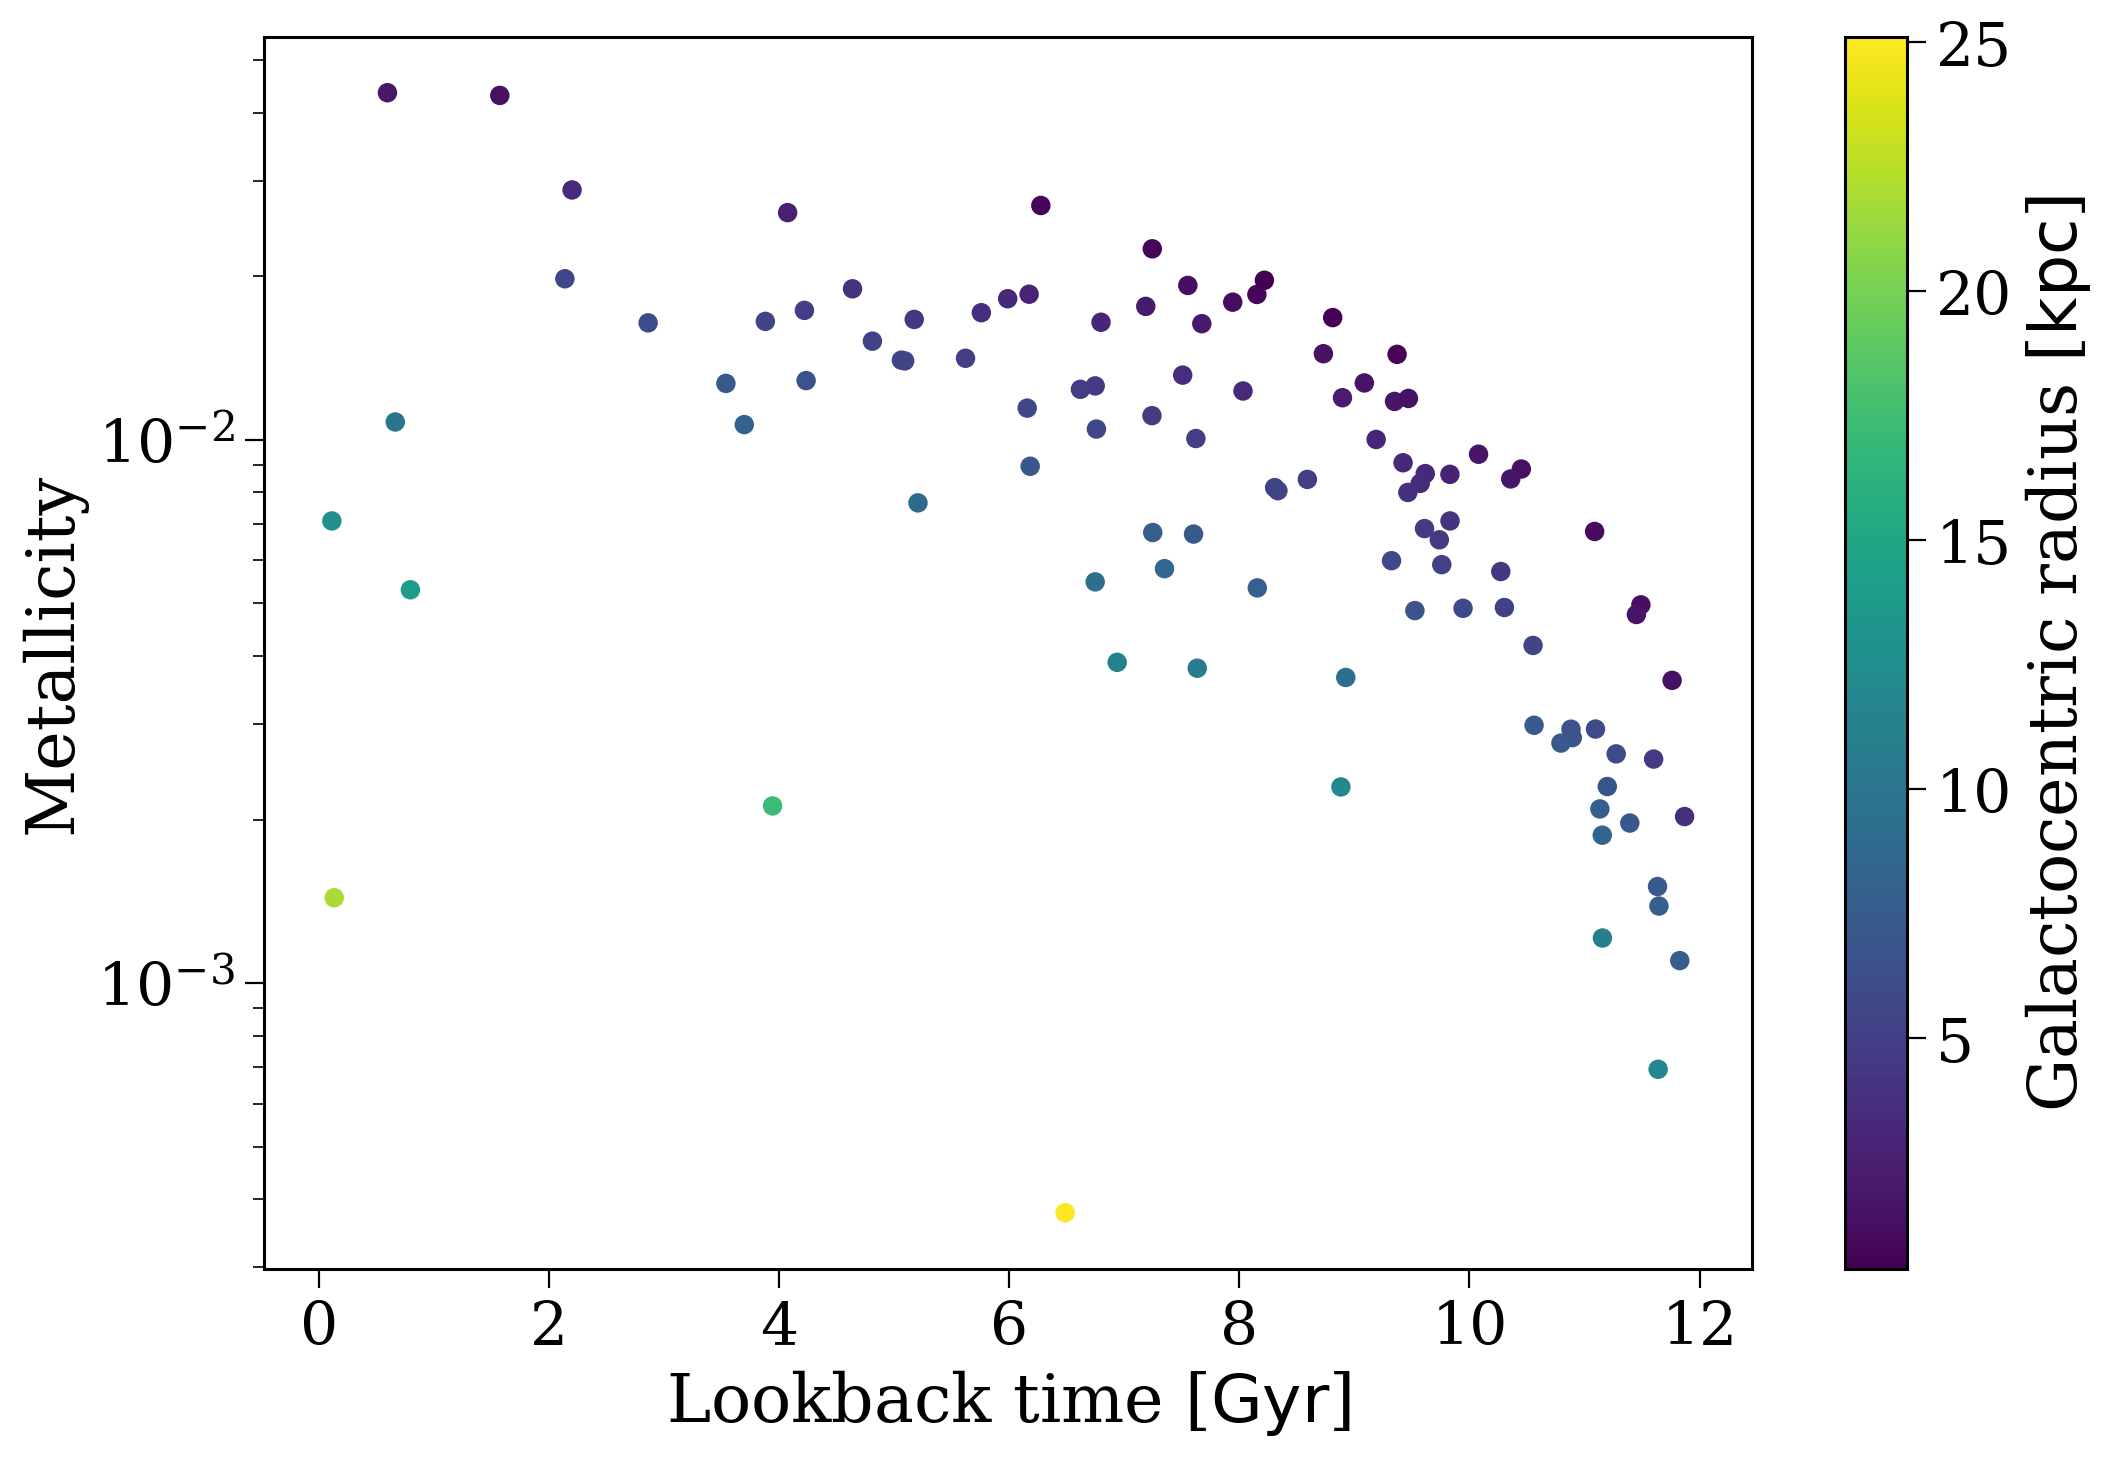

In [9]:
fig, ax = plt.subplots()
scatter = ax.scatter(p.initial_galaxy.tau, p.initial_galaxy.Z, c=p.initial_galaxy.rho)
ax.set(yscale="log", xlabel=f"Lookback time [{p.initial_galaxy.tau.unit:latex}]", ylabel="Metallicity")
fig.colorbar(scatter, label=f"Galactocentric radius [{p.initial_galaxy.rho.unit:latex}]")
plt.show()

One could imagine using this to select out only certain systems that formed in particular locations or at particular times.

In [10]:
from cogsworth.utils import evol_type_translator
[evol_type_translator[i]["long"] for i in range(1, len(evol_type_translator))]

['Initial state',
 'Stellar type changed',
 'Roche lobe overflow started',
 'Roche lobe overflow ended',
 'Binary entered contact phase',
 'Binary coalesced',
 'Common-envelope started',
 'Common-envelope ended',
 'No remnant',
 'Maximum evolution time reached',
 'Binary disrupted',
 'Begin symbiotic phase',
 'End symbiotic phase',
 'Blue straggler',
 'Supernova of primary',
 'Supernova of secondary']

Here's an example set of rows for a certain binary (I'll cherry-pick the most complicated one in this simulations)

In [11]:
n_bpp_rows = np.array([len(p.bpp.loc[i]) for i in p.bin_nums])
complicated_binary = p.bin_nums[np.argmax(n_bpp_rows)]
p.bpp.loc[complicated_binary]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
93,0.000000,7.036929,5.978401,1.0,1.0,2136.168603,3171.742006,0.263324,0.005738,0.005620,1.0,0.000000,0.000000,4.673354e+01,6.824975e+01,0.000000,0.000000,3.549515,3.226968,7.036929,5.978401,1.813824e+03,1031.373206,2.008324e+04,18290.528788,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.065203e+03,3.906071e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,93
93,47.146030,6.961810,5.961660,2.0,1.0,2151.352472,3216.991708,0.263324,0.013420,0.008743,2.0,47.881780,47.328950,4.788178e+01,6.870817e+01,1.319726,0.000000,8.346317,5.065778,6.961810,5.961660,5.382332e+03,1647.484894,1.718956e+04,16411.637394,0.251049,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.281458e+02,1.550350e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.735750,-0.182920,0.0,0.0,93
93,47.298247,6.961097,5.961576,3.0,1.0,2151.485416,3217.389167,0.263324,0.189796,0.008764,2.0,48.045133,47.482773,4.789289e+01,6.871050e+01,1.345974,0.000000,118.043621,5.078371,6.961097,5.961576,2.449079e+03,1650.986655,3.754041e+03,16399.978681,0.254611,0.000000,2.807724e+00,1.000000e-10,7.656525e+01,1.000000e-10,2.364587e+00,1.542498e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,-0.184526,0.0,0.0,93
93,47.364171,6.958444,5.961649,4.0,1.0,2148.921884,3211.961155,0.262293,0.484929,0.008771,2.0,48.111057,47.547308,4.789289e+01,6.870849e+01,1.346741,0.000000,301.636520,5.083910,6.961097,5.961649,9.001328e+03,1652.620454,3.251654e+03,16395.096675,0.254715,0.000000,5.611703e+00,1.000000e-10,3.013818e+02,1.000000e-10,4.385000e-01,1.539255e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,-0.183136,0.0,0.0,93
93,53.471897,6.704316,5.968400,5.0,1.0,2134.944544,3211.568548,0.219075,0.448935,0.009264,2.0,54.218783,53.524141,4.789289e+01,6.852303e+01,1.764199,0.000000,291.177675,5.697460,6.961097,5.968400,6.312216e+03,1817.752099,3.028559e+03,15860.345002,0.307672,0.000000,4.940117e+00,1.000000e-10,2.908700e+02,1.000000e-10,3.722658e-01,1.242340e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,-0.052244,0.0,0.0,93
93,53.768112,6.610728,5.980301,5.0,1.0,1950.199168,2812.936936,0.000000,1.000993,0.007949,3.0,54.514998,53.565409,4.789289e+01,6.819801e+01,1.764199,0.000000,756.699935,5.739869,6.961097,5.980301,2.450645e+04,1839.881606,2.637108e+03,15849.519303,6.952408,0.000000,4.846529e+00,1.000000e-10,7.497475e+02,1.000000e-10,8.158272e-01,8.158272e-01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,0.202703,0.0,0.0,93
93,53.768112,6.610728,5.980301,5.0,1.0,1950.199168,2812.936936,0.000000,1.000993,0.007949,7.0,54.514998,53.565409,4.789289e+01,6.819801e+01,1.764199,0.000000,756.699935,5.739869,6.961097,5.980301,2.450645e+04,1839.881606,2.637108e+03,15849.519303,6.952408,0.000000,4.846529e+00,1.000000e-10,7.497475e+02,1.000000e-10,8.158272e-01,8.158272e-01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,0.202703,0.0,0.0,93
93,53.768112,1.764199,5.980301,9.0,1.0,127.802102,60.170338,0.000000,1.000993,0.007949,8.0,6.525899,53.565409,4.789289e+01,6.819801e+01,1.185226,0.000000,756.699935,5.739869,1.764199,5.980301,2.450645e+04,1839.881606,2.637108e+03,15849.519303,6.952408,0.000000,4.846529e+00,1.000000e-10,7.497475e+02,1.000000e-10,8.158272e-01,8.158272e-01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,-0.746886,0.202703,0.0,0.0,93
93,53.793641,1.248067,6.494573,9.0,1.0,182.484545,102.675483,0.000000,0.000737,0.058149,4.0,6.551428,40.775596,5.955486e+00,5.615723e+01,1.246228,0.000000,0.033503,5.562262,1.764199,6.494573,1.376849e+04,2348.305578,3.431225e+05,17113.251970,0.025260,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.980923e-07,3.841291e+03,0.000000e+00,0.0,0.000000,0.0,

In [12]:
p.translate_tables(label_type="long", replace_columns=False)

In [13]:
p.bpp.loc[complicated_binary][["tphys", "evol_type_str", "mass_1", "mass_2", "kstar_1_str", "kstar_2_str", "sep", "porb", "ecc"]]

,tphys,evol_type_str,mass_1,mass_2,kstar_1_str,kstar_2_str,sep,porb,ecc
93,0.000000,Initial state,7.036929,5.978401,Main Sequence,Main Sequence,2136.168603,3171.742006,0.263324
93,47.146030,Stellar type changed,6.961810,5.961660,Hertzsprung Gap,Main Sequence,2151.352472,3216.991708,0.263324
93,47.298247,Stellar type changed,6.961097,5.961576,First Giant Branch,Main Sequence,2151.485416,3217.389167,0.263324
93,47.364171,Stellar type changed,6.958444,5.961649,Core Helium Burning,Main Sequence,2148.921884,3211.961155,0.262293
93,53.471897,Stellar type changed,6.704316,5.968400,Early Asymptotic Giant Branch,Main Sequence,2134.944544,3211.568548,0.219075
93,53.768112,Roche lobe overflow started,6.610728,5.980301,Early Asymptotic Giant Branch,Main Sequence,1950.199168,2812.936936,0.000000
93,53.768112,Common-envelope started,6.610728,5.980301,Early Asymptotic Giant Branch,Main Sequence,1950.199168,2812.936936,0.000000
93,53.768112,Common-envelope ended,1.764199,5.980301,Helium Giant Branch,Main Sequence,127.802102,60.170338,0.000000
93,53.793641,Roche lobe overflow ended,1.248067,6.494573,Helium Giant Branch,Main Sequence,182.484545,102.675483,0.000000
93,53.794317,Stellar type changed,1.247875,6.494572,Oxygen/Neon White Dwarf,Main Sequence,182.489087,102.680594,0.000000


A tad less brain-melting no?

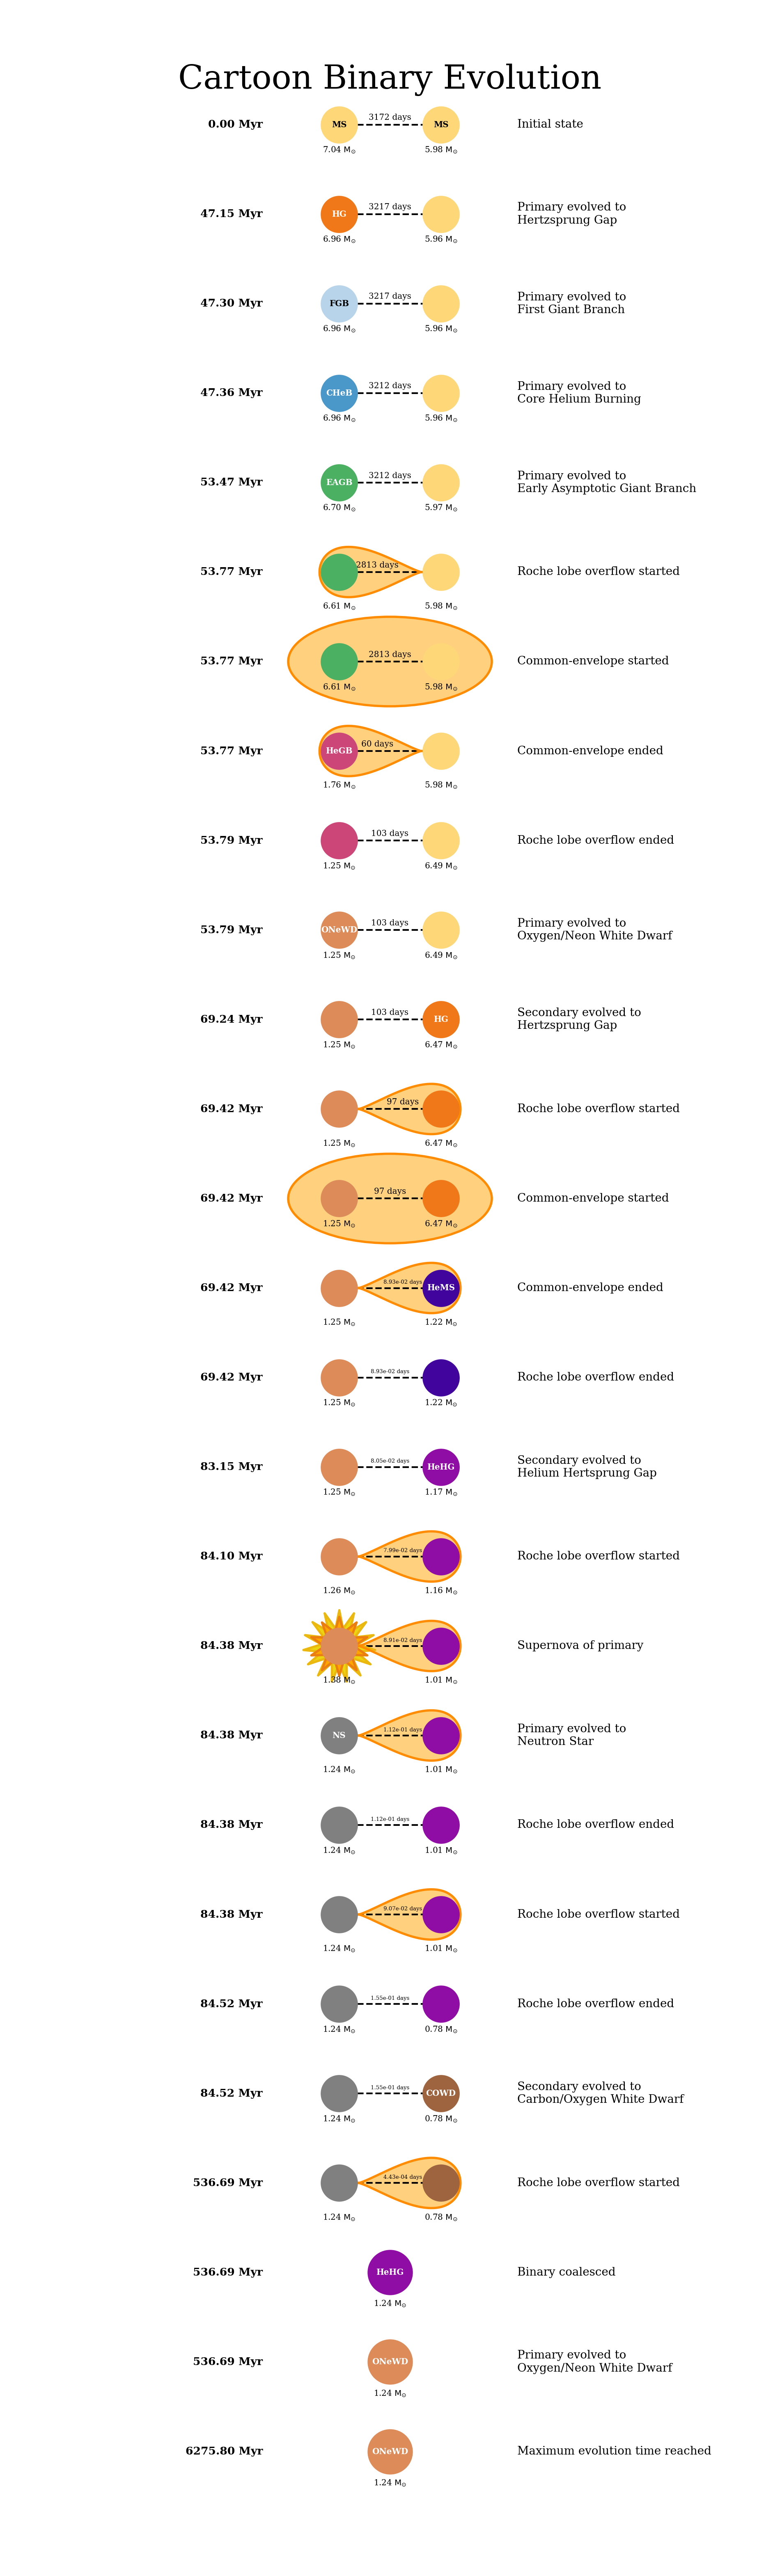

In [14]:
p.plot_cartoon_binary(complicated_binary);

Here's the table for the systems that actually received kicks

In [15]:
p.kick_info.loc[p.kick_info[p.kick_info["natal_kick"] > 0.0]["bin_num"].unique()]

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
1,1.0,1.0,624.398902,-27.400876,261.398091,0.0,-130.934352,562.641904,-126.276119,591.316645,-38.391109,-10.972791,10.108249,41.188057,0.0,0.0,-8.343805e+08,1.0
1,2.0,1.0,304.679156,57.506385,324.838085,0.0,0.000000,0.000000,0.000000,591.316645,210.089979,-147.993134,163.675352,291.464247,0.0,0.0,1.426528e+09,1.0
4,1.0,1.0,644.591909,-67.668806,110.098833,0.0,-289.368681,31.952488,80.905576,302.160400,29.019307,40.694454,54.059646,73.624752,0.0,0.0,-6.813455e+07,4.0
4,2.0,1.0,199.328587,33.977663,311.589282,0.0,0.000000,0.000000,0.000000,302.160400,73.944932,-83.317569,165.294329,246.037662,0.0,0.0,8.448418e+08,4.0
5,1.0,1.0,445.453200,31.892759,284.659517,0.0,291.180169,195.479908,-150.448307,381.618892,39.151328,-2.146038,44.549976,59.347556,0.0,0.0,-1.486640e+08,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,100.0
101,1.0,1.0,131.009079,-42.714132,298.589988,0.0,-7.746105,95.070006,12.378491,96.184901,-13.352886,1.499215,-2.623681,13.690541,0.0,0.0,-3.010644e+07,101.0
101,2.0,1.0,146.338413,-57.105069,216.223769,0.0,0.000000,0.000000,0.000000,96.184901,99.125675,72.612196,79.476416,136.951873,0.0,0.0,1.136186e+09,101.0
102,2.0,0.0,352.371081,31.106361,225.250368,0.0,152.442156,-185.922040,-257.603887,352.371081,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-5.206277e+08,102.0


First let's look at the orbit of a bound binary

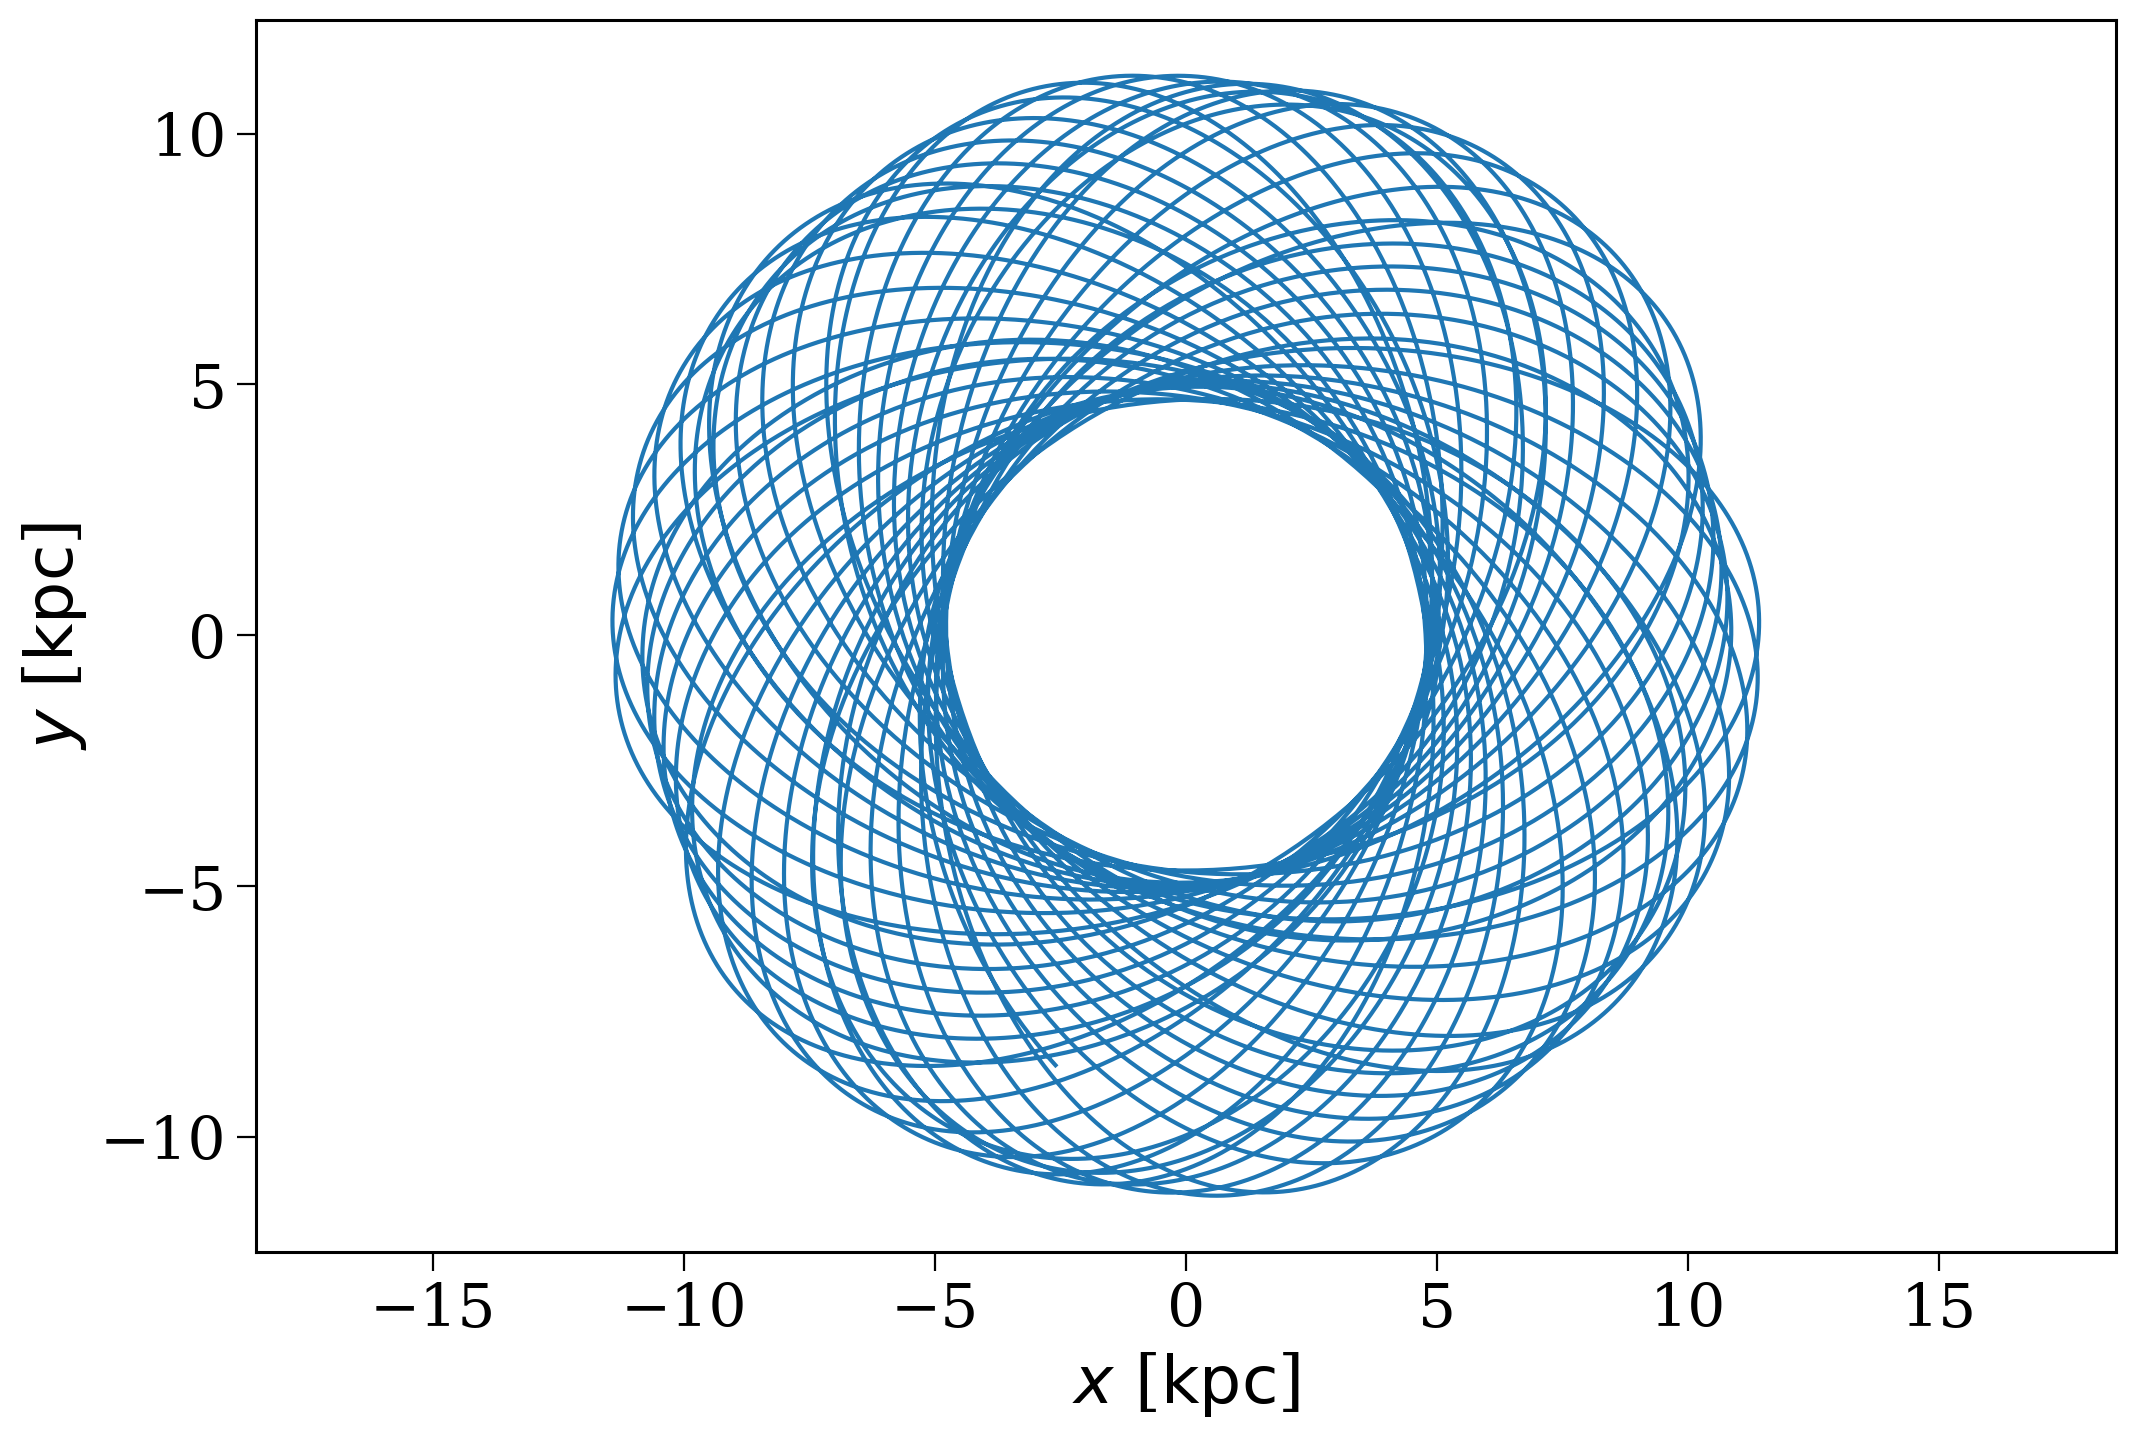

In [76]:
fig, ax = plt.subplots()
bound_orbits = p.primary_orbits[~p.disrupted]
np.random.choice(bound_orbits).plot(['x', 'y'], axes=[ax])
plt.show()

And now let's pick a random disrupted system

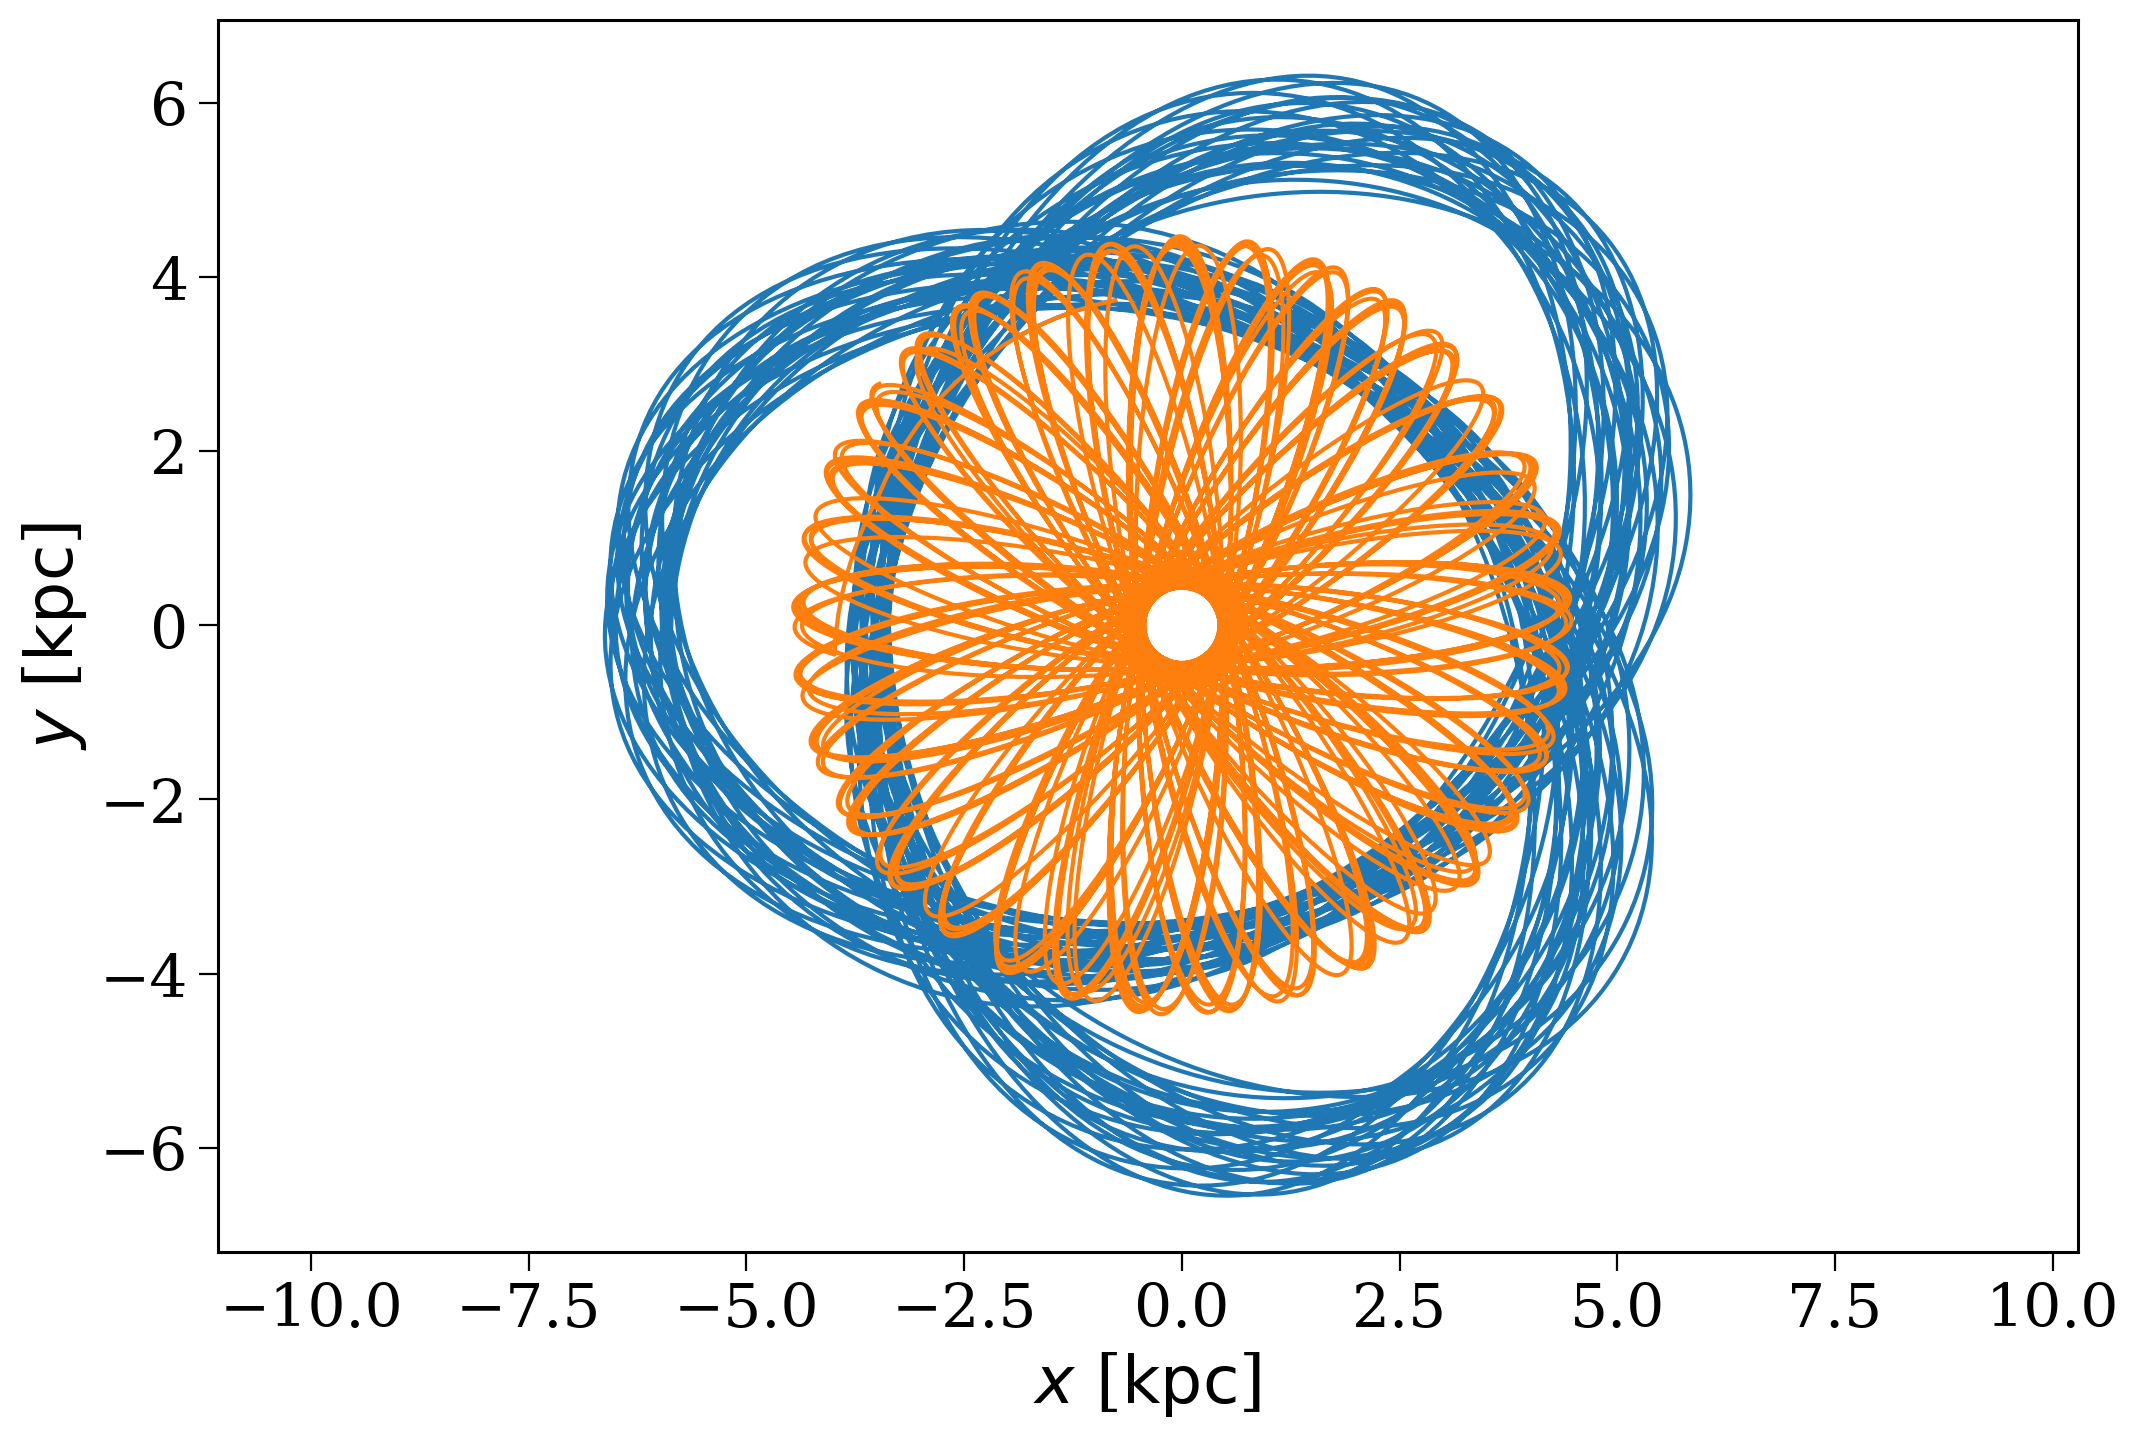

In [79]:
fig, ax = plt.subplots()
random_disrupted_ind = np.random.randint(p.disrupted.sum())
p.primary_orbits[p.disrupted][random_disrupted_ind].plot(['x', 'y'], axes=[ax])
p.secondary_orbits[p.disrupted][random_disrupted_ind].plot(['x', 'y'], axes=[ax])
plt.show()

In [83]:
p.final_pos

<Quantity [[-2.40093102e+00,  5.21249072e+00,  1.01842276e+00],
           [ 2.78466436e+01,  3.72587020e+01,  2.21144543e+01],
           [-2.17514065e+01, -4.27143452e+00,  5.94663561e-01],
           [-9.50070585e+00, -2.46184425e+01, -3.21748586e-02],
           [ 2.07792366e+00,  8.01202142e-01, -4.47415266e-02],
           [-5.76484277e+01, -1.09643705e+02, -1.89623014e+01],
           [-1.00656801e+01,  6.66541432e+00,  1.32632109e-02],
           [-3.80225642e+00, -1.75028037e+00, -3.16118802e+00],
           [ 4.85791194e+00,  7.07739928e-01, -7.19615088e-01],
           [ 1.10209991e-01, -3.61332574e+00,  8.69871375e-02],
           [-2.59327317e+03, -4.82045772e+03, -5.33330378e+03],
           [-4.74033133e-01,  1.24071880e+00,  5.34603288e-03],
           [-6.61460261e-01, -1.22091051e+00, -8.33797123e-02],
           [ 4.62038875e+00, -5.00487422e+00, -3.18771125e+00],
           [-1.76674959e+00, -5.65379827e+00,  2.30777032e-01],
           [-7.43082081e-02,  2.82297928

In [84]:
p.final_vel

<Quantity [[-2.12133263e+02, -9.02850977e+01, -3.42384064e+01],
           [ 2.16257487e+02,  4.23339252e+02,  3.04398261e+02],
           [ 4.12906118e+01, -2.05646573e+02,  4.79266143e+00],
           [ 1.89199667e+02, -7.37499928e+01,  1.51969000e+00],
           [ 4.81796910e-01, -4.15310323e+01,  3.98860583e+01],
           [ 9.94717870e+01,  1.37549555e+02,  3.40163458e+01],
           [-1.23990726e+02, -1.84041170e+02,  4.58033048e-01],
           [ 7.14551249e+01, -1.92637978e+02,  4.30896747e+01],
           [-9.12371426e+01,  1.13344749e+02, -7.87639886e+01],
           [ 2.28983181e+02, -7.23169882e+01,  2.91751803e+01],
           [-2.56531528e+02, -4.77803013e+02, -5.28041636e+02],
           [-1.52341630e+02, -6.16447383e+01,  3.07266619e+01],
           [ 1.28054150e+02, -8.60170086e+01, -6.41570412e-01],
           [ 1.50148583e+02,  1.49463342e+02,  2.65813155e+02],
           [ 1.94449331e+02, -5.39080491e+01, -1.73390242e+02],
           [-2.15419924e+02, -1.12019436